In [39]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as op

In [23]:
data = np.loadtxt("ex2data1.txt", delimiter = ',')
X = data[:, 0 : 2]
y = data[:, 2]
m = len(y)
X = np.concatenate((np.ones((m, 1)), X.reshape(m, 2)), axis = 1)
y = y.reshape(m, 1)

In [12]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [19]:
sigmoid(0)

0.5

In [61]:
def costFunction(theta, X, y):
    theta = theta.reshape(3, 1)
    S1 = np.dot(y.T, np.log(sigmoid(np.dot(X, theta))))
    S2 = np.dot((1 - y).T, np.log(1 - sigmoid(np.dot(X, theta))))
    cost = -1 / m * (S1 + S2)
    return cost

In [59]:
def gradient(theta, X, y):
    theta = theta.reshape(3, 1)
    tmp = sigmoid(np.dot(X, theta)) - y
    gradient = 1 / m * np.dot(X.T, tmp)
    return gradient

In [38]:
test_theta = np.array([-24, 0.2, 0.2]).reshape(3, 1)
cost, gradient = costFunction(X, y, test_theta)
print(cost)
print(gradient)

[[0.21833019]]
[[0.04290299]
 [2.56623412]
 [2.64679737]]


In [69]:
init_theta = np.zeros(3)
result = op.minimize(fun = costFunction, x0 = init_theta, args = (X, y), method = 'TNC', jac = gradient)
learned_theta = result['x']

In [73]:
predictX = np.array([1, 45, 85]).reshape(1, 3)
res = sigmoid(np.dot(predictX, learned_theta))
print(res)

[0.77629062]


In [74]:
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros((m, 1))
    
    p = np.round(sigmoid(np.dot(X, theta)))
    return p

In [92]:
p = predict(learned_theta, X).reshape(m, 1)
print(np.mean(p == y) * 100)

89.0


In [97]:
def plotDecisionBoundary(theta, X, y):
    plotData(X[:, 1 : 3], y)
    
    if X.shape[1] <= 3:
        x1 = np.array([np.amin(X[:,1]) - 2, np.amax(X[:,1]) + 2])
        x2 = -(theta[0] + theta[1] * x1) / theta[2]
        plt.plot(x1, x2)
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((len(u), len(v)))
        
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = np.dot(mapFeature(np.array([u[i]]).reshape(1,1), np.array([v[j]]).reshape(1,1)), theta)
        plt.contour(u, v, z.T, [0])

In [95]:
def plotData(X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.plot(X[pos, 0], X[pos, 1], 'k+', markersize = 8, linewidth = 10)
    plt.plot(X[neg, 0], X[neg, 1], 'ko', markersize = 8, markerfacecolor = 'y')

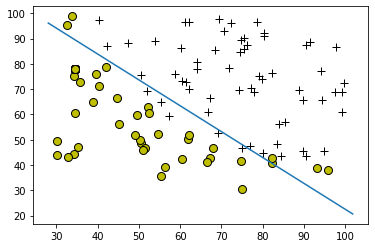

In [98]:
plotDecisionBoundary(learned_theta, X, y)